<a href="https://colab.research.google.com/github/cyborgrob/MT_Reviews_SA/blob/master/MT_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Sorted CSV and add 'Sentiment' Column

In [ ]:
# Add sentiment scores based on 'rating' column
df = pd.read_csv("/content/drive/MyDrive/MT_Reviews_SA/sorted.csv")
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

In [ ]:
df

,date,rating,review_text,sentiment
0,2021-07-03 00:00:00,4,I loved the food here so much. But I have to s...,positive
1,2021-07-04 00:00:00,5,"Awesome!! Love the space, large indoor space, ...",positive
2,2021-07-08 00:00:00,4,Busy summer evening at happy hour so tables we...,positive
3,2021-07-09 00:00:00,4,Been here a few times and the atmosphere is de...,positive
4,2021-07-11 00:00:00,5,Just a fun place. Even though we are vaccinate...,positive
...,...,...,...,...
420,2024-03-02 22:16:00,4,"Super fun and active, great beer.",positive
421,2024-03-08 02:07:00,5,Authentic place. Great vibe,positive
422,2024-03-08 09:55:00,5,Women's International Day at MadTree Brewery. ...,positive
423,2024-03-08 10:42:00,5,Great selection of beer! We loved the atmosphere.,positive


In [ ]:
# Let's make a copy of the dataframe in case we need to revert back
df_copy = df

### Text Cleaning
Let's clean the text to prepare it for analysis

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download required nltk packages
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
df['cleaned_review_text'] = df['review_text'].apply(clean_text)
df.head()

,date,rating,review_text,sentiment,cleaned_review_text
0,2021-07-03 00:00:00,4,I loved the food here so much. But I have to s...,positive,loved food much say service lacking food order...
1,2021-07-04 00:00:00,5,"Awesome!! Love the space, large indoor space, ...",positive,awesome love space large indoor space even lar...
2,2021-07-08 00:00:00,4,Busy summer evening at happy hour so tables we...,positive,busy summer evening happy hour table little ha...
3,2021-07-09 00:00:00,4,Been here a few times and the atmosphere is de...,positive,time atmosphere decent beer well nothing reall...
4,2021-07-11 00:00:00,5,Just a fun place. Even though we are vaccinate...,positive,fun place even though vaccinated sat outside f...


### Exploratory Data Analysis (EDA)
Let's explore the data a bit.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sentiment_distribution = df['sentiment'].value_counts(normalize=True) # `normalize=True` returns percentages, `False` returns raw counts
sentiment_distribution

positive    0.868235
negative    0.131765
Name: sentiment, dtype: float64

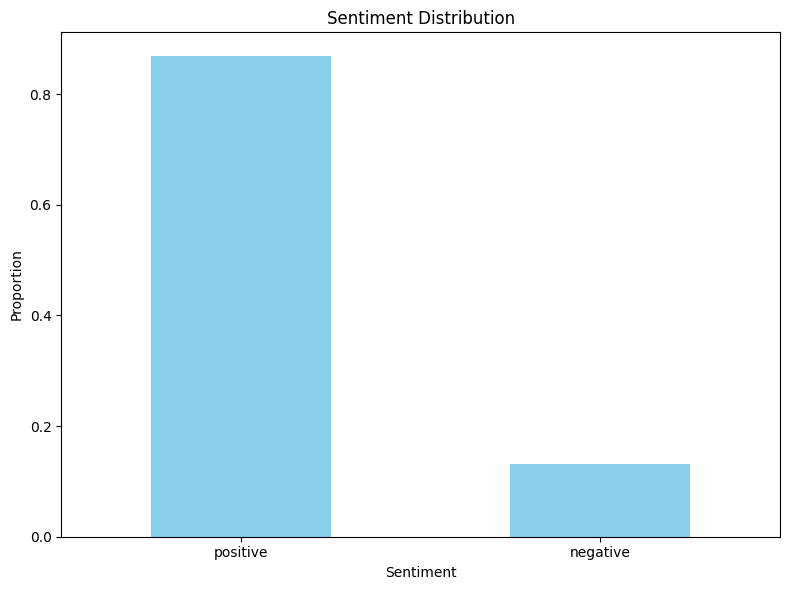

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

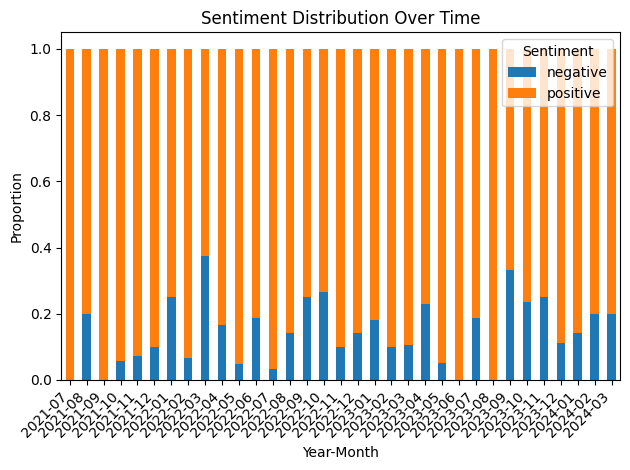

In [ ]:
# Convert 'date' column to 'datetime' dtype if needed
df['date'] = pd.to_datetime(df['date'])

# Compare sentiment distribution across different time periods (e.g., months or years)
df['year_month'] = df['date'].dt.to_period('M')
sentiment_by_month = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_month_percentage = sentiment_by_month.div(sentiment_by_month.sum(axis=1), axis=0)

# Plot sentiment distribution over time
plt.figure(figsize=(10, 6))
sentiment_by_month_percentage.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,date,rating,review_text,sentiment,cleaned_review_text,year_month
0,2021-07-03,4,I loved the food here so much. But I have to s...,positive,loved food much say service lacking food order...,2021-07
1,2021-07-04,5,"Awesome!! Love the space, large indoor space, ...",positive,awesome love space large indoor space even lar...,2021-07
2,2021-07-08,4,Busy summer evening at happy hour so tables we...,positive,busy summer evening happy hour table little ha...,2021-07
3,2021-07-09,4,Been here a few times and the atmosphere is de...,positive,time atmosphere decent beer well nothing reall...,2021-07
4,2021-07-11,5,Just a fun place. Even though we are vaccinate...,positive,fun place even though vaccinated sat outside f...,2021-07


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_ngrams(text, sentiment, pos_or_neg, ngram_range=(1, 2)):
    # Filter reviews by sentiment
    text_filtered = text[sentiment == pos_or_neg]
    # Initialize CountVectorizer to generate n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    # Fit and transform text data to extract n-grams
    X = vectorizer.fit_transform(text_filtered)
    # Get the feature names
    ngrams = vectorizer.get_feature_names_out()
    # Get the count of each n-gram
    ngram_counts = X.sum(axis=0).A1
    # Create a dict mapping ngram to its count
    ngram_freq = dict(zip(ngrams, ngram_counts))
    # Sort the dict by frequency in descending order
    sorted_ngram_freq = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_ngram_freq

great beer: 40
great place: 38
dog friendly: 25
great atmosphere: 22
beer selection: 21
beer great: 20
fire pizza: 19
good beer: 19
catch fire: 18
beer good: 17


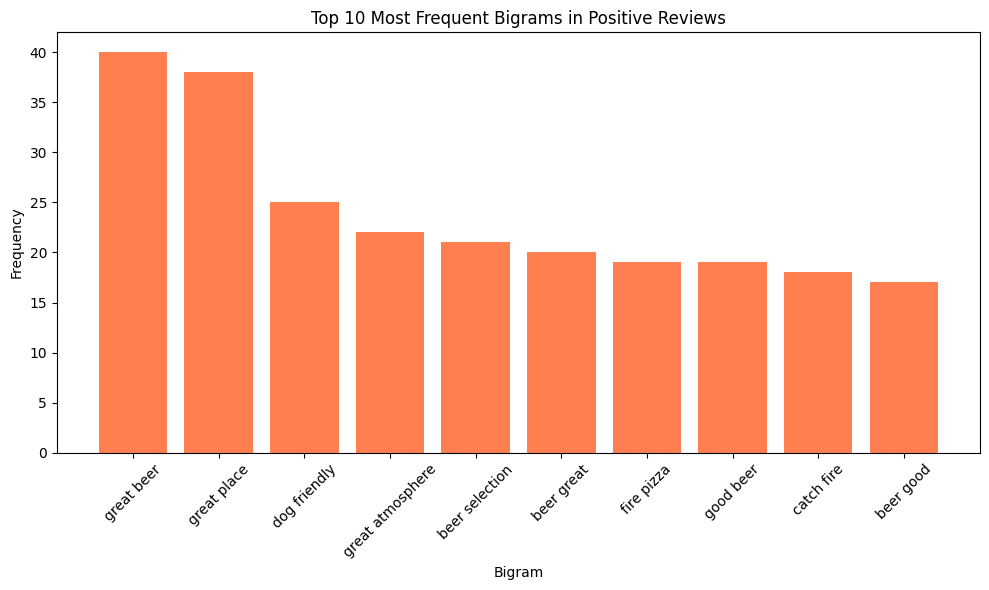

In [ ]:
# Extract bigrams from cleaned review text
ngrams = extract_ngrams(df['cleaned_review_text'], df['sentiment'], 'positive', ngram_range=(2, 2))

# Display top 10 most frequent bigrams
top_ngrams = ngrams[:10]
for ngram, freq in top_ngrams:
    print(f'{ngram}: {freq}')

# Plot the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_ngrams), color="coral")
plt.title('Top 10 Most Frequent Bigrams in Positive Reviews')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

food ready: 6
parking lot: 5
beer good: 4
fire pizza: 4
food drink: 3
friday night: 3
good beer: 3
love beer: 3
beer okay: 2
beer pizza: 2


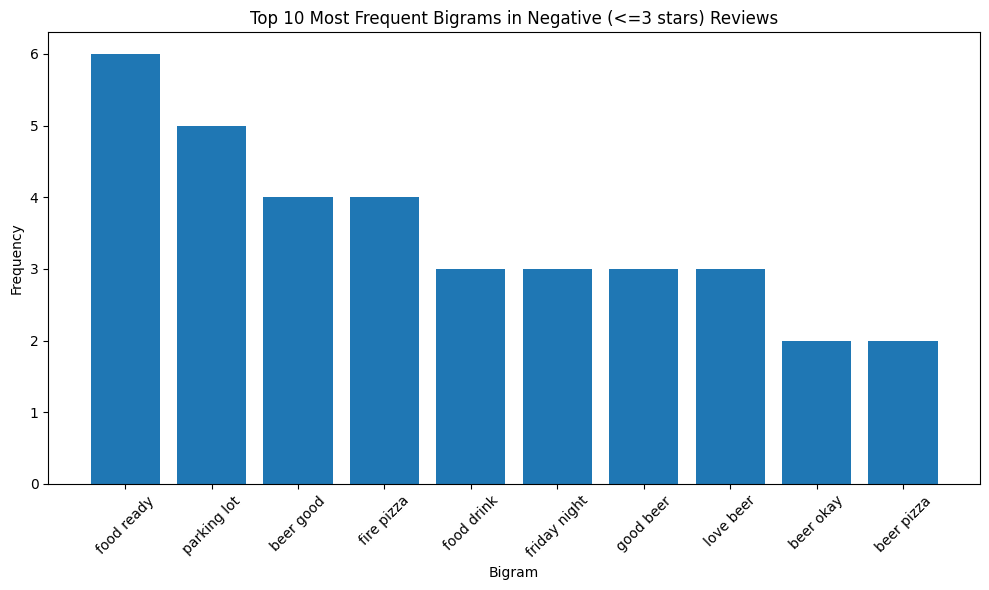

In [ ]:
# Extract bigrams from cleaned review text
ngrams = extract_ngrams(df['cleaned_review_text'], df['sentiment'], 'negative', ngram_range=(2, 2))

# Display top 10 most frequent bigrams
top_ngrams = ngrams[:10]
for ngram, freq in top_ngrams:
    print(f'{ngram}: {freq}')

# Plot the most frequent bigrams
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_ngrams))
plt.title('Top 10 Most Frequent Bigrams in Negative (<=3 stars) Reviews')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Let's try out some Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) to see if we can find any latent topics

In [ ]:
# LDA

from gensim import corpora, models
# Filter for negative reviews
negative_reviews = df[df['sentiment'] == 'negative']

# Tokenize the cleaned review text
tokenized_reviews = negative_reviews['cleaned_review_text'].apply(lambda x: x.split())

# Create a dictionary mapping words to unique ids
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a bag-of-words representation of the corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train the LDA model
num_topics = 5 # Specify the number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.011*"parking" + 0.009*"great" + 0.009*"didnt" + 0.009*"music" + 0.009*"madtree" + 0.008*"bad" + 0.008*"beer" + 0.008*"drink" + 0.008*"time" + 0.007*"lot"')
(1, '0.013*"place" + 0.013*"good" + 0.011*"kid" + 0.011*"experience" + 0.010*"dog" + 0.010*"one" + 0.008*"beer" + 0.008*"madtree" + 0.008*"family" + 0.008*"coffee"')
(2, '0.019*"food" + 0.015*"pizza" + 0.013*"beer" + 0.010*"wing" + 0.009*"place" + 0.007*"get" + 0.007*"half" + 0.007*"great" + 0.006*"parking" + 0.006*"dog"')
(3, '0.024*"food" + 0.023*"beer" + 0.015*"nice" + 0.014*"pizza" + 0.014*"dog" + 0.012*"really" + 0.010*"good" + 0.010*"like" + 0.010*"madtree" + 0.010*"people"')
(4, '0.023*"could" + 0.013*"good" + 0.013*"table" + 0.013*"ok" + 0.010*"pizza" + 0.010*"asked" + 0.009*"nice" + 0.008*"beer" + 0.007*"drink" + 0.007*"make"')


Now let's try to visualize.

In [ ]:
# Install wordcloud
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
!C:\Users\rwynn\anaconda3\python.exe -m pip install wordcloud

/bin/bash: line 1: C:Usersrwynnanaconda3python.exe: command not found


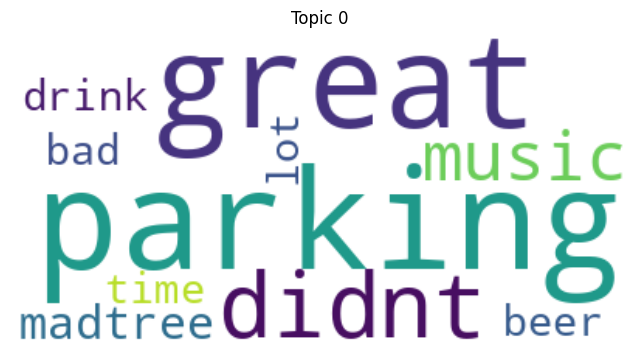

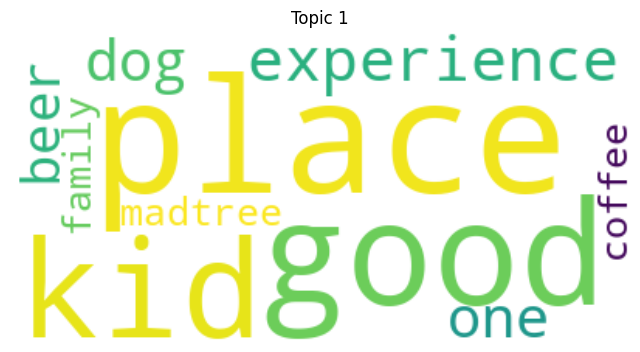

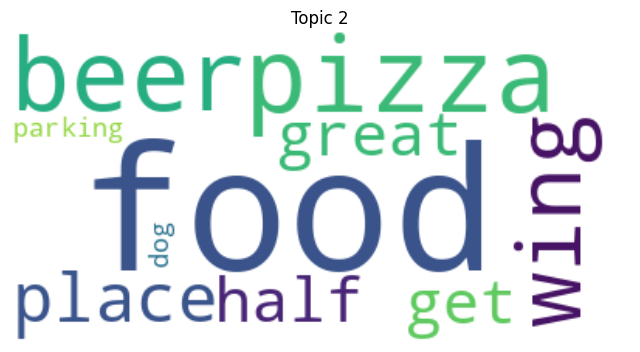

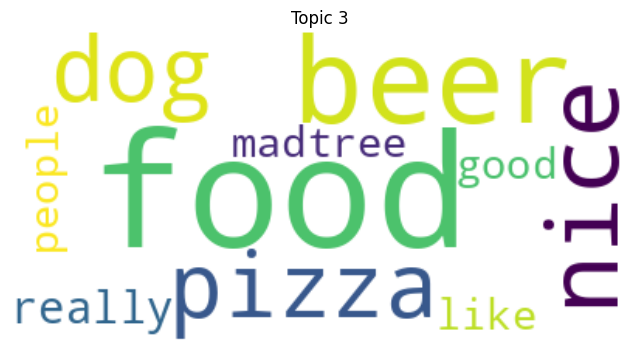

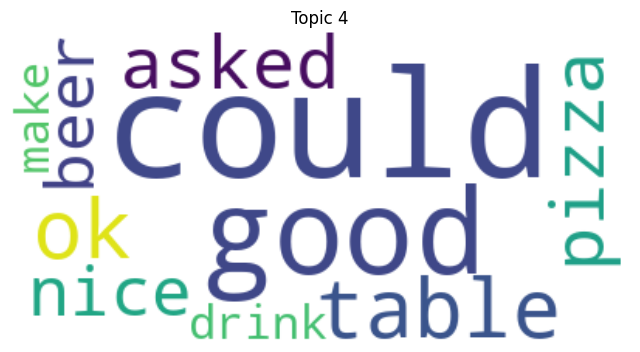

In [ ]:
from wordcloud import WordCloud

# Iterate through the topics and create word clouds
for topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    topic_words = dict(topic[1])
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Topic ' + str(topic[0]))
    plt.axis('off')
    plt.show()

In [ ]:
# NMF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned review text
tfidf_matrix = vectorizer.fit_transform(negative_reviews['cleaned_review_text'])

# Specify number of topics
num_topics = 5

# Initialize and fit the NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_index, topic in enumerate(nmf_model.components_):
    print(f"Topic {topic_index}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Topic 0:
kid place dog running parent screaming bar child table venue
Topic 1:
good beer area brewery loud leave outside shop large great
Topic 2:
pizza eaten hour wait enjoyed took parking beer burnt ok
Topic 3:
food ready really working service like order terrible atmosphere text
Topic 4:
drink asked rude bad time make staff said bar bartender


Let's visualize the NMF output.

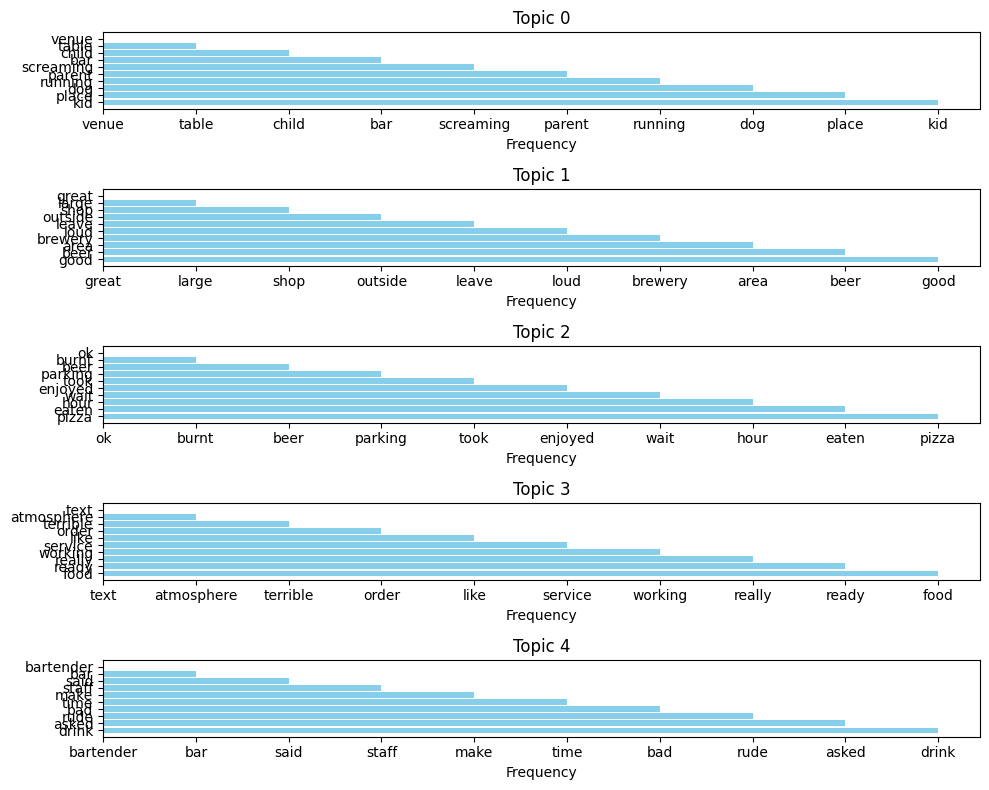

In [ ]:
# Define the top words for each topic
top_words = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words.append([feature_names[i] for i in topic.argsort()[:-11:-1]])

# Plot the top words for each topic
fig, axs = plt.subplots(nrows=num_topics, figsize=(10, 8))
for i, ax in enumerate(axs):
    ax.barh(range(10), top_words[i][::-1], color='skyblue')
    ax.set_title(f'Topic {i}')
    ax.set_xlabel('Frequency')
    ax.invert_yaxis()
    ax.set_yticks(range(10))
    ax.set_yticklabels(top_words[i][::-1])
plt.tight_layout()
plt.show()

#### Let's try some keyword extraction and see what we can see.

In [ ]:
import re

# Define keywords for aspect extraction
aspect_keywords = {'food': ['food', 'meal', 'dish', 'pizza', 'pizzas', 'wings', 'bread', 'catch a fire', 'catch-a-fire', 'caf', 'appetizer', 'appetizers', 'pie'],
                   'service': ['service', 'waiter', 'waitress', 'staff', 'bar staff', 'bartender', 'bartenders'],
                   'parking': ['parking', 'parking lot', 'park'],
                   'beer': ['beer', 'beers', 'ipa', 'ipas', 'lager', 'stout', 'stouts', 'wine', 'brew', 'brews', 'drink', 'drinks'],
                   'cocktails': ['cocktail', 'cocktails', 'sway', 'mocktail', 'mocktails', 'mixed drinks'],
                   'dogs': ['dog', 'dogs', 'puppy'],
                   'kids': ['kid', 'kids', 'child', 'children'],
                   'price': ['price', 'prices', 'value', 'cost'],
                   'atmosphere': ['atmosphere', 'place', 'vibe', 'space', 'venue', 'crowd', 'ambiance', 'spot', 'brewery'],}

# Function to extract aspects from review text
def extract_aspects(review_text):
    aspects = []
    for aspect, keywords in aspect_keywords.items():
        for keyword in keywords:
            if re.search(r'\b{}\b'.format(keyword), review_text, flags=re.IGNORECASE):
                aspects.append(aspect)
                break
    return aspects

In [ ]:
# Apply aspect extraction function to review text column
df['aspects'] = df['review_text'].apply(extract_aspects)
df

,date,rating,review_text,sentiment,cleaned_review_text,year_month,aspects
0,2021-07-03 00:00:00,4,I loved the food here so much. But I have to s...,positive,loved food much say service lacking food order...,2021-07,"[food, service, dogs, atmosphere]"
1,2021-07-04 00:00:00,5,"Awesome!! Love the space, large indoor space, ...",positive,awesome love space large indoor space even lar...,2021-07,"[food, beer, dogs, kids, atmosphere]"
2,2021-07-08 00:00:00,4,Busy summer evening at happy hour so tables we...,positive,busy summer evening happy hour table little ha...,2021-07,"[food, parking, beer]"
3,2021-07-09 00:00:00,4,Been here a few times and the atmosphere is de...,positive,time atmosphere decent beer well nothing reall...,2021-07,"[beer, atmosphere]"
4,2021-07-11 00:00:00,5,Just a fun place. Even though we are vaccinate...,positive,fun place even though vaccinated sat outside f...,2021-07,"[food, beer, cocktails, dogs, atmosphere]"
...,...,...,...,...,...,...,...
420,2024-03-02 22:16:00,4,"Super fun and active, great beer.",positive,super fun active great beer,2024-03,[beer]
421,2024-03-08 02:07:00,5,Authentic place. Great vibe,positive,authentic place great vibe,2024-03,[atmosphere]
422,2024-03-08 09:55:00,5,Women's International Day at MadTree Brewery. ...,positive,woman international day madtree brewery glorio...,2024-03,[atmosphere]
423,2024-03-08 10:42:00,5,Great selection of beer! We loved the atmosphere.,positive,great selection beer loved atmosphere,2024-03,"[beer, atmosphere]"


Now we have extracted the various aspects of each review. Let's try to analyze the sentiments associated with each of them.

In [ ]:
# Sample DataFrame with review text and extracted aspects
test_df = pd.DataFrame({'review_text': ["The food was excellent but the service was slow.",
                                   "Great atmosphere but parking was a nightmare."],
                   'aspects': [['food', 'service'], ['atmosphere', 'parking']]})


# Function to perform sentiment analysis at aspect level
def analyze_sentiment_aspects(review_text, aspects):
    # Placeholder sentiment lexicons (replace with your actual lexicons)
    aspect_sentiment_lexicons = {
        'food': {'positive': ['excellent', 'tasty'], 'negative': ['slow', 'bland']},
        'service': {'positive': ['excellent', 'friendly'], 'negative': ['slow', 'poor']},
        'atmosphere': {'positive': ['great', 'pleasant'], 'negative': ['noisy', 'crowded']},
        'parking': {'positive': ['convenient', 'ample'], 'negative': ['nightmare', 'limited']}
    }

    aspect_sentiments = {}
    for aspect in aspects:
        sentiment_scores = {'positive': 0, 'negative': 0, 'neutral': 0}
        for word in review_text.split():
            if word.lower() in aspect_sentiment_lexicons.get(aspect, {}).get('positive', []):
                sentiment_scores['positive'] += 1
            elif word.lower() in aspect_sentiment_lexicons.get(aspect, {}).get('negative', []):
                sentiment_scores['negative'] += 1
            else:
                sentiment_scores['neutral'] += 1
        aspect_sentiments[aspect] = sentiment_scores

    return aspect_sentiments

# Apply sentiment analysis function to each row in the DataFrame
test_df['aspect_sentiments'] = test_df.apply(lambda row: analyze_sentiment_aspects(row['review_text'], row['aspects']), axis=1)
test_df

,review_text,aspects,aspect_sentiments
0,The food was excellent but the service was slow.,"[food, service]","{'food': {'positive': 1, 'negative': 0, 'neutr..."
1,Great atmosphere but parking was a nightmare.,"[atmosphere, parking]","{'atmosphere': {'positive': 1, 'negative': 0, ..."


Think we're going to need something a little more in-depth than this simple rules-based analysis. Let's try a BERT model.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load pre-trained AUTO tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Load pre-trained AUTO model for sequence classification (AutoModel will look at the bert-base-uncased model’s configuration and choose the appropriate base model architecture to use)
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment', num_labels=5, ignore_mismatched_sizes=True)  # 3 labels: positive, negative, neutral

# Encode some review text into a tensor
tokens = tokenizer.encode("this place is the worst. terrible", return_tensors="pt")
print(tokens)

# Decode the tensor back into review text
decoded = tokenizer.decode(tokens[0])
print(decoded)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tensor([[  101, 10372, 11125, 10127, 10103, 43060,   119, 50334,   102]])
[CLS] this place is the worst. terrible [SEP]


In [ ]:
# Pass tokens to model to return sentiment
result = model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 4.6927,  1.7371, -0.7612, -2.9128, -2.0949]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
result.logits

tensor([[ 4.6927,  1.7371, -0.7612, -2.9128, -2.0949]],
       grad_fn=<AddmmBackward0>)

In [ ]:
torch.argmax(result.logits) + 1  # 1 is the worst, 5 is the best (as in star reviews)

tensor(1)

Let's continue with the sentiment analysis. We can see that when the statement is positive:

In [ ]:
tokens = tokenizer.encode("i love this product so much", return_tensors="pt")
result = model(tokens)
torch.argmax(result.logits) + 1

tensor(5)

The result is a '5', as in '5 stars'. But when the statement is negative:

In [ ]:
tokens = tokenizer.encode("the food is the worst", return_tensors="pt")
result = model(tokens)
torch.argmax(result.logits) + 1

tensor(1)

It results in just 1 star. And with a neutral statement:

In [ ]:
tokens = tokenizer.encode("this place is just ok", return_tensors="pt")
result = model(tokens)
torch.argmax(result.logits) + 1

tensor(3)

It lands right in the middle with 3 stars. So how can we go about applying this to individual aspect statements? Meaning, not an entire review, but specifically to individual phrases that reference specific aspects of the business. For example, if the review text were: "The food was good but the service was awful", we would want to first extract the aspects 'food' and 'service', and then also apply a sentiment to each aspect. In this case, we'd want 'food' to get a 'positive' sentiment and 'service' to get a negative sentiment. How can we achieve this?

## Aspect Term Extract and Sentiment Analysis via [PyABSA](https://github.com/yangheng95/PyABSA)

In [ ]:
pip install pyabsa==1.16.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 7.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boostaug to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00


In [ ]:
# pip install pyabsa[dev] -U # Have to run this because next cell code is crashing

In [ ]:
from pyabsa import available_checkpoints
# Had to roll back version to 1.16.28 due to crashing on Google Colab. Let's see if it works...
checkpoint_map = available_checkpoints()
checkpoint_map

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Version 1.16.28 of pyabsa is outdated. Version 2.4.1 was released Friday February 23, 2024.
PyABSA INFO: The PyABSA >= 2.0.0 version contains breaking changes, if you want to use the training and inference scripts (in demos directory), please do not upgrade to the >= 2.0.0 version
check release notes at https://github.com/yangheng95/PyABSA/blob/release/release-note.json
There may be some checkpoints available for early versions of PyABSA, see 


/usr/local/lib/python3.10/dist-packages/pyabsa/functional/checkpoint/checkpoint_manager.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if max_ver == "N.A." or StrictVersion(min_ver) <= StrictVersion(


{'1.16.0+': {'APC': {'english': {'id': '',
    'Training Model': 'FAST-LSA-T-V2',
    'Training Dataset': 'English',
    'Language': 'English',
    'Description': 'Trained on RTX3090',
    'Available Version': '1.6.3+',
    'Checkpoint File': 'fast_lsa_t_v2_English_acc_84.01_f1_83.77.zip',
    'Author': 'H, Yang (yangheng@m.scnu.edu.cn)'},
   'chinese': {'id': 'https://drive.google.com/file/d/1B0RHazOCm2eOWLWExQkeapHr9d3OiZl7/view?usp=sharing',
    'Training Model': 'FAST-LCF-MDeBERTa',
    'Training Dataset': 'Chinese',
    'Language': 'Chinese',
    'Description': 'Trained on RTX3090',
    'Available Version': '1.8.2+',
    'Checkpoint File': 'fast_lcf_bert_Chinese_acc_97.11_f1_96.54.zip',
    'Author': 'H, Yang (yangheng@m.scnu.edu.cn)'},
   'multilingual': {'id': '',
    'Training Model': 'FAST-LSA-T-V2',
    'Training Dataset': 'Multilingual',
    'Language': 'Multilingual',
    'Description': 'Trained on RTX3090',
    'Available Version': '1.8.2+',
    'Checkpoint File': 'fast_ls

In [ ]:
# Load spaCy
import spacy

# To fix the error where it couldn't find 'en_core_web_sm', I updated pip and used the following line (instead of just 'pip install spacy' and 'python -m spacy download en_core_web_sm')
# I'm not sure if we even need this part since we rolled back the PyABSA version to 1.16.28 due to crashing issues in Google Colab
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl

nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Extract aspect terms and classify sentiments

In [ ]:
from pyabsa import ATEPCCheckpointManager

# Init aspect extractor from online checkpoint or local checkpoint
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',
                                                             auto_device=True  # False will load model on CPU
                                                            )

There may be some checkpoints available for early versions of PyABSA, see ATEPC
Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


577MB [00:02, 232.56MB/s, Downloading checkpoint...]                         

Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip, unzipping...


Done.
If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA-ATEPC/resolve/main/checkpoint/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip 
Load aspect extractor from ./checkpoints/ATEPC_ENGLISH_CHECKPOINT
config: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.config
state_dict: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.tokenizer


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Aspect term extract & sentiment inference
# You can inference from a list of sentences or a DatasetItem from PyABSA
examples = ['the food is good but the service is terrible', 'The beer is just ok']
inference_source = examples
atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,
                                               pred_sentiment=True # Predict the sentiment of the extracted aspect terms
                                              )

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: the <food:Positive Confidence:0.9986191987991333> is good but the <service:Negative Confidence:0.9997484087944031> is terrible
Example 1: The <beer:Neutral Confidence:0.996595561504364> is just ok


/usr/local/lib/python3.10/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:507: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  lcf_cdm_vec = torch.tensor(
/usr/local/lib/python3.10/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:590: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()


In [ ]:
atepc_result

[{'sentence': 'the food is good but the service is terrible',
  'IOB': ['O', 'B-ASP', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O'],
  'tokens': ['the',
   'food',
   'is',
   'good',
   'but',
   'the',
   'service',
   'is',
   'terrible'],
  'aspect': ['food', 'service'],
  'position': [[2], [7]],
  'sentiment': ['Positive', 'Negative'],
  'probs': [[0.0013380011077970266, 4.288229320081882e-05, 0.9986191987991333],
   [0.9997484087944031, 5.436040009954013e-05, 0.000197210960322991]],
  'confidence': [0.9986191987991333, 0.9997484087944031]},
 {'sentence': 'The beer is just ok',
  'IOB': ['O', 'B-ASP', 'O', 'O', 'O'],
  'tokens': ['The', 'beer', 'is', 'just', 'ok'],
  'aspect': ['beer'],
  'position': [[2]],
  'sentiment': ['Neutral'],
  'probs': [[0.00014034011110197753,
    0.996595561504364,
    0.0032641305588185787]],
  'confidence': [0.996595561504364]}]

#### So now we can extract aspects and the related sentiment from some given text. Let's apply this to our dataframe and see if we can extract the aspects from our reviews and then apply sentiments to them. The purpose of this is to get sentiment for specific aspects, not just a rules-based sentiment for the overall review like we've been using so far.

In [ ]:
df.head()

,date,rating,review_text,sentiment,cleaned_review_text,year_month,aspects
0,2021-07-03,4,I loved the food here so much. But I have to s...,positive,loved food much say service lacking food order...,2021-07,"[food, service, dogs, atmosphere]"
1,2021-07-04,5,"Awesome!! Love the space, large indoor space, ...",positive,awesome love space large indoor space even lar...,2021-07,"[food, beer, dogs, kids, atmosphere]"
2,2021-07-08,4,Busy summer evening at happy hour so tables we...,positive,busy summer evening happy hour table little ha...,2021-07,"[food, parking, beer]"
3,2021-07-09,4,Been here a few times and the atmosphere is de...,positive,time atmosphere decent beer well nothing reall...,2021-07,"[beer, atmosphere]"
4,2021-07-11,5,Just a fun place. Even though we are vaccinate...,positive,fun place even though vaccinated sat outside f...,2021-07,"[food, beer, cocktails, dogs, atmosphere]"


In [ ]:
# Load review texts into variable 'examples' and make it a list
examples = df['review_text'].tolist()
type(examples)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


list

In [ ]:
# Run the list through the model
inference_source = examples
atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,
                                               pred_sentiment=True # Predict the sentiment of the extracted aspect terms
                                              )

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importli

The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: I loved the food here so much . But I have to say the service was lacking and the food ordering process wasn ' t my favorite . I had to wait in line for the food to get a menu and never saw a list of food options on a board or anything . They should probably rethink a few things . The menus should be before you get in line . Then I ordered and it took over 30 minutes for the pizza , wings and cheese bread . They gave us garlic parm wings which were just ok when I ordered bbq wings . The wings were just ok . Bbq and parm sauce tasted generic and not impressive . The pizza and cheese bread though were fantastic . The pizza had nice medium sized chunks of potato and really great white sauce . I enjoyed the ranch too . It had jalapeños and green onions too . The cheesy bread was super garlicky and cheezy which we both loved . Came with marinara sauce . Now they were super busy so maybe 

In [ ]:
for sample in examples:
  print(f"Example {examples.index(sample)}: {len(sample)}")

Example 0: 1348
Example 1: 266
Example 2: 472
Example 3: 210
Example 4: 309
Example 5: 119
Example 6: 314
Example 7: 61
Example 8: 473
Example 9: 85
Example 10: 102
Example 11: 127
Example 12: 35
Example 13: 293
Example 14: 217
Example 15: 25
Example 16: 334
Example 17: 323
Example 18: 106
Example 19: 215
Example 20: 527
Example 21: 241
Example 22: 245
Example 23: 95
Example 24: 30
Example 25: 36
Example 26: 110
Example 27: 437
Example 28: 77
Example 29: 412
Example 30: 98
Example 31: 101
Example 32: 412
Example 33: 12
Example 34: 268
Example 35: 57
Example 36: 33
Example 37: 170
Example 38: 351
Example 39: 459
Example 40: 276
Example 41: 367
Example 42: 34
Example 43: 119
Example 44: 882
Example 45: 1194
Example 46: 604
Example 47: 198
Example 48: 480
Example 49: 265
Example 50: 1025
Example 51: 1026
Example 52: 262
Example 53: 104
Example 54: 1702
Example 55: 58
Example 56: 11
Example 57: 133
Example 58: 1497
Example 59: 159
Example 60: 75
Example 61: 82
Example 62: 338
Example 63: 5

In [62]:
# Around ~350 seems to be the cutoff for length of sample where the model stops working. It's not 100% though, which is a little strange.
# Probably because it's based on # of tokens, not number of characters.
# But definitely the longest reviews don't have extraction/analysis and the shortest reviews do.